# Linear Regression
for Wednesday's Lab scroll down please


In [196]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [91]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [92]:
numerical = df.select_dtypes(include = np.number)


array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

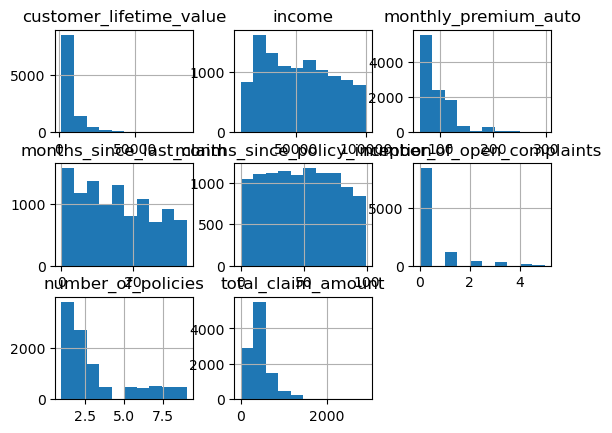

In [93]:
numerical.hist()

In [94]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

### X-y split (y is the target variable, in this case, "total claim amount")

In [95]:
#X = numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']]
#y = numerical['total_claim_amount']

### Train-test split

In [96]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


### Standardize the data (after the data split!).

In [98]:
from sklearn.preprocessing import StandardScaler

In [120]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#scaler.fit(X_test)

#X_train_std = scaler.transform(X_train)
#X_test_std = scaler.transform(X_test)


In [100]:
from sklearn.preprocessing import PowerTransformer

In [115]:
#pt = PowerTransformer(
#yeo_X_train = pt.fit_transform(X_train)
#yeo_X_test = pt.fit_transform(X_test)

In [116]:
#pd.DataFrame(yeo_X_test).hist(bins=60)

# Apply linear regression

In [103]:
from sklearn.linear_model import LinearRegression

In [121]:
#lm = LinearRegression() 
#model = lm.fit(X_train_std, y_train)

### Model Interpretation

In [105]:
print(model.coef_)
print(model.intercept_)

[ -2.13594719 -36.7201968  161.12276203   3.5527067   -2.03301237
  -1.17714444   1.58807445]
433.3067361668137


In [134]:
#X_test_reshaped = X_test_std.reshape(-1,7)

#y_test_reshaped = np.array(y_train).reshape(-1,1)

In [135]:
#y_pred = model.predict(X_test_reshaped)

In [133]:
#print(X_train_std.shape)


(7482, 7)


In [136]:
#y_test_reshaped.shape

(7482, 1)

In [138]:
#compare = pd.DataFrame({'y_test':list(y_test), 'y_pred':list(y_pred)})

In [233]:
#compare

In [147]:
print(model.coef_)
print(model.intercept_)

[ -6.03281323 -34.54166177 185.39472195   1.56863312  -3.63635333
   1.55614824   3.30428432]
431.7756099789201


In [240]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [241]:
#mse(y_test,y_pred)

In [235]:
#mae(y_test, y_pred)

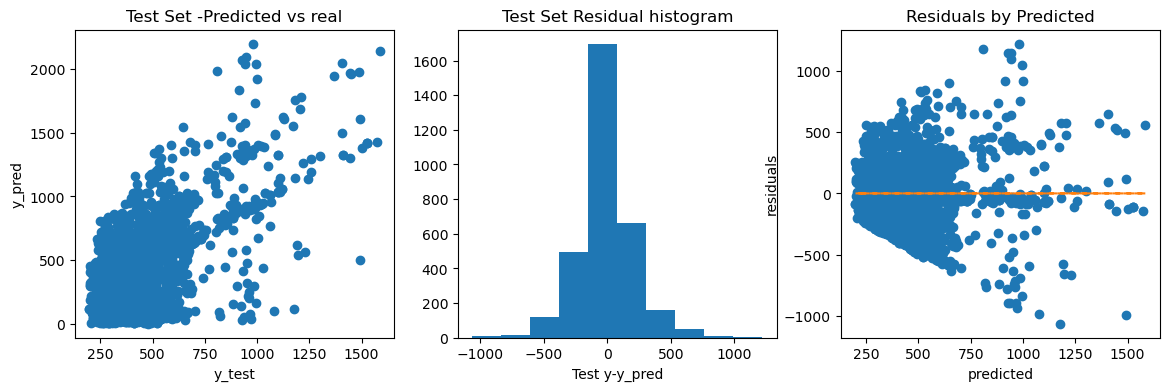

In [146]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [ ]:
use powertransform on total_claim_amount

# (Wednesday)

Model Validation
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
vAdjusted R2.
Feature Importance.
Model Iteration (Wednesday and Thursday)
Rerun the model after adding the hot encoded categorical variables as well as other numeric categorical variables (e.g. number of open

In [191]:
categorical = df.select_dtypes(include = object)

In [192]:
nominal_df = categorical[['region', 'response', 'gender','location_code', 'marital_status', 'policy', 'renew_offer_type','sales_channel', 'vehicle_class']]

In [193]:
ordinal_df = categorical[['coverage', 'education', 'policy_type', 'vehicle_size']]

In [197]:
nominal = pd.get_dummies(nominal_df)

In [198]:
le = LabelEncoder()
le.fit(['basic', 'extended', 'premium'])
ordinal_df['coverage'] = le.transform(ordinal_df['coverage'])

le.fit(['college', 'bachelor', 'high school or below', 'doctor', 'master'])
ordinal_df['education'] = le.transform(ordinal_df['education'])

le.fit(['corporate auto', 'personal auto', 'special auto'])
ordinal_df['policy_type'] = le.transform(ordinal_df['policy_type'])

le.fit(['medsize', 'small', 'large'])
ordinal_df['vehicle_size'] = le.transform(ordinal_df['vehicle_size'])

C:\Users\Tahor\AppData\Local\Temp\ipykernel_15444\1201075409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['coverage'] = le.transform(ordinal_df['coverage'])
C:\Users\Tahor\AppData\Local\Temp\ipykernel_15444\1201075409.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['education'] = le.transform(ordinal_df['education'])
C:\Users\Tahor\AppData\Local\Temp\ipykernel_15444\1201075409.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [199]:
categorical_concat = pd.concat([ordinal_df, nominal], axis=1)
categorical_concat

,coverage,education,policy_type,vehicle_size,region_central,region_east,region_north west,region_west region,response_no,response_yes,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,1,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,0,1,1,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,1,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,2,0,1,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,1,1,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
10685,0,1,1,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
10686,1,0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
10687,2,1,1,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [200]:
new_df = pd.concat([numerical, categorical_concat], axis=1)

In [205]:
X = new_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'coverage', 'education', 'policy_type', 'vehicle_size',
       'region_central', 'region_east', 'region_north west',
       'region_west region', 'response_no', 'response_yes', 'gender_f',
       'gender_m', 'location_code_rural', 'location_code_suburban',
       'location_code_urban', 'marital_status_divorced',
       'marital_status_married', 'marital_status_single',
       'policy_corporate l1', 'policy_corporate l2', 'policy_corporate l3',
       'policy_personal l1', 'policy_personal l2', 'policy_personal l3',
       'policy_special l1', 'policy_special l2', 'policy_special l3',
       'renew_offer_type_offer1', 'renew_offer_type_offer2',
       'renew_offer_type_offer3', 'renew_offer_type_offer4',
       'sales_channel_agent', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_four-door car', 'vehicle_class_luxury car',
       'vehicle_class_luxury suv', 'vehicle_class_sports car',
       'vehicle_class_suv', 'vehicle_class_two-door car']]

In [206]:
y = new_df[['total_claim_amount']]

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [209]:
pt = PowerTransformer()
pt.fit(X_train)
pt.fit(X_test)

X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

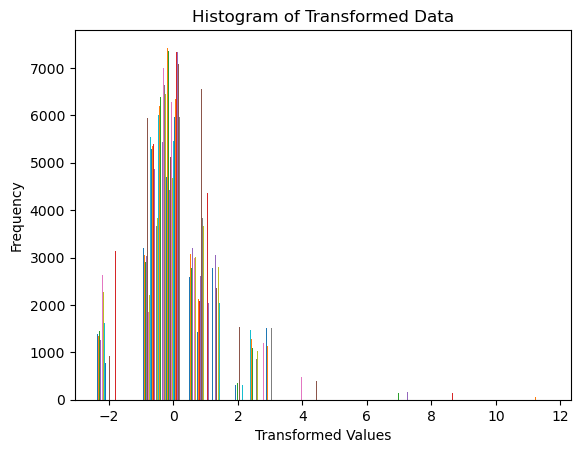

In [211]:
plt.hist(X_train_transformed, bins=10)  # Adjust the number of bins as needed
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed Data')
plt.show()

In [213]:
lm = LinearRegression()
model = lm.fit(X_train_transformed, y_train)

In [214]:
print(model.coef_)
print(model.intercept_)

[[ 4.15603006e+00  9.60373350e-01  1.03649817e+02 -1.42386610e+00
  -3.89601702e-01 -4.72549788e+00 -1.35445696e+00  8.94577567e+00
   1.15324736e+00 -6.35946340e+15 -1.54266195e-01  2.02260104e+15
   1.27989529e+15  2.01359581e+15  2.09131985e+15 -3.31469484e+15
  -3.31469484e+15  5.86236560e+14  5.86236560e+14 -1.59415517e+15
  -1.96237828e+15 -1.55674184e+15  2.58023421e+15  3.54717713e+15
   3.19246004e+15 -2.31055213e+15 -2.88956460e+15 -3.66670314e+15
   2.47284531e+14  3.09980149e+14  3.55749956e+14  1.42741391e+15
   2.29204677e+15  2.13648984e+15 -1.91840223e+14 -1.81162981e+14
  -1.42368033e+14 -1.21083126e+14  1.83455576e+15  1.72275118e+15
   1.46506322e+15  1.32296577e+15  2.34471476e+14  6.03375318e+13
   6.24926588e+13  1.03300298e+14  1.89162839e+14  1.89802340e+14]]
[434.68173617]


In [216]:
X_train_transformed.shape

(7482, 48)

In [217]:
y_pred = model.predict(X_test_transformed)

In [237]:
#
y_test = np.array(y_test).ravel()
y_pred = np.array(y_pred).ravel()
compare = pd.DataFrame({'y_test':list(y_test), 'y_pred':list(y_pred)})

In [222]:
 compare

,y_test,y_pred
0,120,-30.740139
1,660,652.322361
2,244,310.322361
3,86,-53.677639
4,1032,1048.072361
...,...,...
3202,406,500.259861
3203,321,344.322361
3204,45,117.322361
3205,597,608.322361


In [247]:
mse = np.square(np.subtract(y_test,y_pred)).mean()
rmse = np.sqrt(mse)
mae_value = mae(y_test, y_pred)  
r2 = r2_score(y_test, y_pred) 

In [248]:
print('Mean of Squared Error is ', mse)
print('Root Mean of Squared Error is ', rmse)
print('Mean of Absolute Error is', mae)
print('R squared is ', r2)

Mean of Squared Error is  22250.71751388379
Root Mean of Squared Error is  149.16674399437628
Mean of Absolute Error is <function mean_absolute_error at 0x0000021F3AD2A710>
R squared is  0.7335600981862301


In [249]:
n = X_test_std.shape[0]  # number of samples
p = X_test_std.shape[1]  # number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

### Adjusted R2.

In [251]:
print(adjusted_r2)

0.7329770787074255


### Feature Importance.

In [253]:
coefficients = model.coef_.flatten()
feature_importance = pd.DataFrame({'Features': X.columns, 'Coefficient': coefficients})

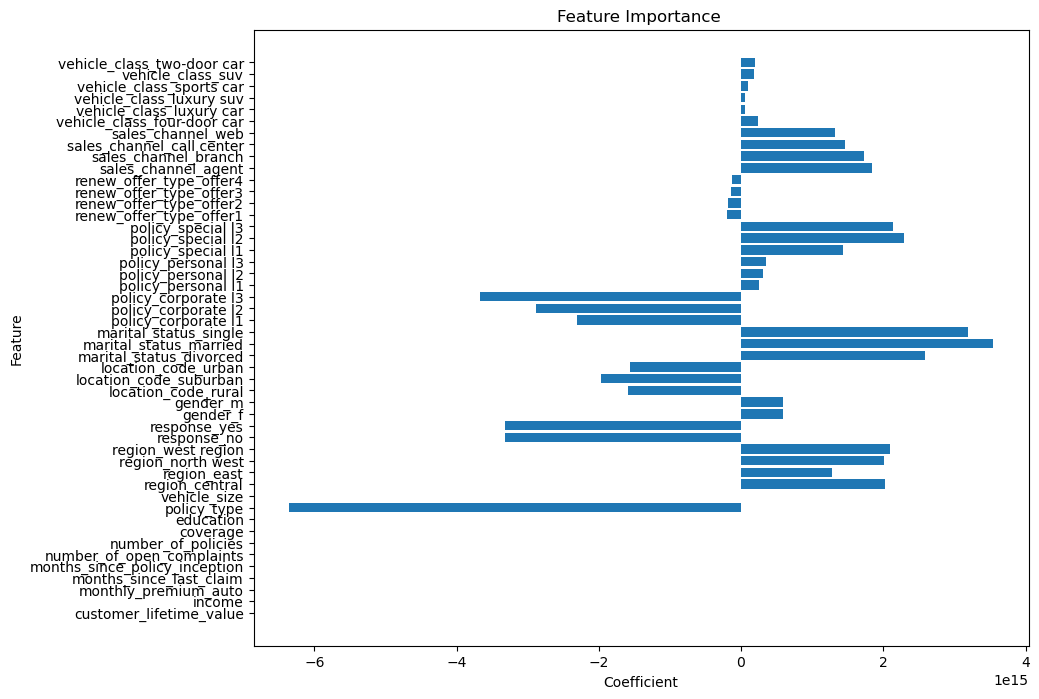

In [254]:
plt.figure(figsize= (10,8))
plt.barh(feature_importance['Features'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance ')
plt.show()